Detected Number is: AB, 1833 Lay



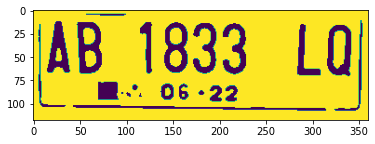

In [4]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img = cv2.imread('1.jpeg')
# img = cv2.resize(img,(620,480))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(gray, 9, 75, 75)

th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

imgcnt = th.copy()

cnt = cv2.findContours(imgcnt,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)
cnt = sorted(cnt,key=cv2.contourArea,reverse = True)[:10]

detected = None
screencnt = None
for c in cnt:
    
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    #if there are four DP 
    if len(approx) == 4:
        screencnt = approx
            #detected == 1
        break
        
#masking other part
mask = np.zeros(gray.shape,np.uint8)


try:
    new_image = cv2.drawContours(mask,[screencnt],0,255,-1)
    new_image = cv2.bitwise_and(img,img,mask=mask)
    #cropping process
    (x,y) = np.where(mask ==255)
    (topx,topy) = (np.min(x),np.min(y))
    (bottomx,bottomy) = (np.max(x),np.max(y))
    cropped = gray[topx:bottomx+1, topy:bottomy+1]
    blur = cv2.GaussianBlur(cropped,(5,5),0)
    ret,th = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV)
    text = pytesseract.image_to_string(th,config='--psm 7')
    print("Detected Number is:",text)
except:
    print('no detected contour')


plt.imshow(th)
# cv2.waitKey(0)
# cv2.destroyAllWindows()